### Algoritmos de Aprendizaje No supervisado.

### Importar librerías

In [11]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans



from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


In [12]:

# Cargar el dataset
data = pd.read_csv('input/creditcard.csv')


In [13]:

# Separar características y etiquetas
X = data.drop(columns=['Class'])
y = data['Class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)


## Isolation Forest

In [14]:

# Ajustar el modelo de Isolation Forest
model = IsolationForest(contamination=0.00172, random_state=42)  
model.fit(X_train)


IsolationForest(contamination=0.00172, random_state=42)

In [15]:

# Hacer predicciones
# Isolation Forest predice -1 para anomalías (fraudes) y 1 para datos normales
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convertir las predicciones a 0 y 1: -1 se convierte en 1 (fraude) y 1 se convierte en 0 (no fraude)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)


Reporte de Clasificación - Conjunto de Prueba
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.25      0.26       148

    accuracy                           1.00     85443
   macro avg       0.64      0.62      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Matriz de Confusión - Conjunto de Prueba


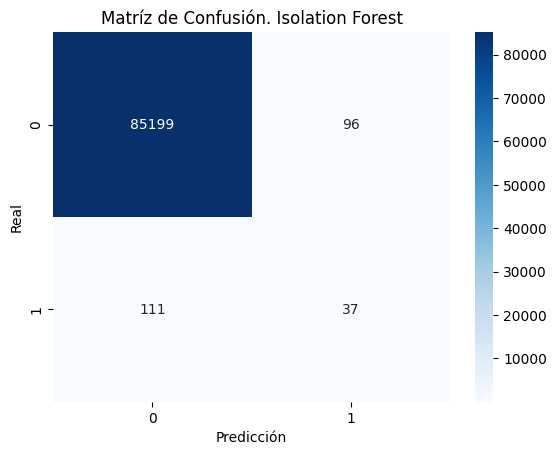

Reporte de Clasificación - Conjunto de Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.26      0.26      0.26       344

    accuracy                           1.00    199364
   macro avg       0.63      0.63      0.63    199364
weighted avg       1.00      1.00      1.00    199364

Matriz de Confusión - Conjunto de Entrenamiento


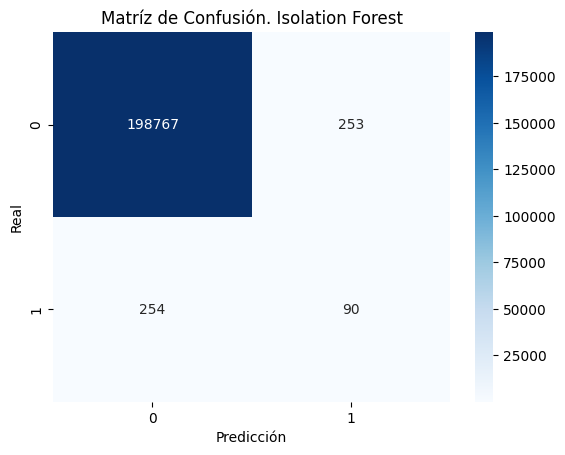

In [16]:

# Reporte de clasificación y matriz de confusión para el conjunto de prueba
print("Reporte de Clasificación - Conjunto de Prueba")
print(classification_report(y_test, y_pred_test))

print("Matriz de Confusión - Conjunto de Prueba")
cmISF=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmISF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de Confusión. Isolation Forest')
plt.show()

# Reporte de clasificación y matriz de confusión para el conjunto de entrenamiento
print("Reporte de Clasificación - Conjunto de Entrenamiento")
print(classification_report(y_train, y_pred_train))

print("Matriz de Confusión - Conjunto de Entrenamiento")
cmISF=confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmISF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de Confusión. Isolation Forest')
plt.show()

## K-Means

In [17]:
data = pd.read_csv('input/creditcard.csv')

# Supongamos que 'data' es tu DataFrame con la columna 'Class'
X = data.drop(columns=['Class'])
y = data['Class']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Reporte de Clasificación - Conjunto Completo
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.42      0.56       492

    accuracy                           1.00    284807
   macro avg       0.92      0.71      0.78    284807
weighted avg       1.00      1.00      1.00    284807

Matriz de Confusión - Conjunto Completo


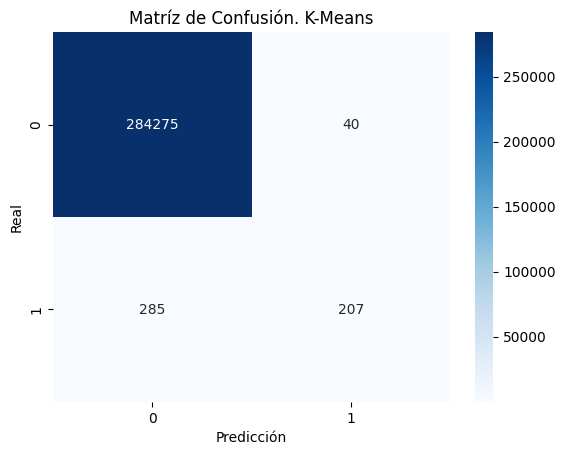

In [18]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas del clustering
clusters = kmeans.labels_

# Crear un DataFrame con las etiquetas verdaderas y las etiquetas del cluster
df = pd.DataFrame({'true_label': y, 'cluster': clusters})

# Asignar etiquetas a los clusters
label_mapping = df.groupby('cluster')['true_label'].apply(lambda x: x.value_counts().index[0]).to_dict()

# Convertir las etiquetas del cluster a las etiquetas de fraude/no fraude
predicted_labels = np.array([label_mapping[cluster] for cluster in clusters])

# Reporte de clasificación
print("Reporte de Clasificación - Conjunto Completo")
print(classification_report(y, predicted_labels))

# Matriz de Confusión
print("Matriz de Confusión - Conjunto Completo")
cmKM=confusion_matrix(y, predicted_labels)
sns.heatmap(cmKM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matríz de Confusión. K-Means')
plt.show()